## 4.2 Simulating a waveform over a single tree
<img src=img/lidar_leaf.gif>

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from run_start import *
from hips import hips2img, read_header

In [2]:
from generate_camera_file import update_existing_camera

In [3]:
# here we can assume our scene units are ~metres, therefore we 
# need to convert our LiDAR pulse (4 ns) into m.

L = 1e-9 * 299792458 # speed of light m/ns
pl_ln = 4 * L # pulse length @ 4 ns
pl_sd = 1 # how much of a gaussian
boomLength = 10 # height of illumination (and camera)
footprint = 5

update_existing_camera('light/pulse.lidar', 'light/large_footprint.lidar',
                       new_options={'lidar.pulseStart':pl_ln/2.,
                                    'lidar.pulseSD':pl_sd,
                                    'lidar.pulseLength':pl_ln,
                                    'lidar.pulseOPFile':'light/large.pulse',
                                    'geometry.boomLength':10,
                                    'geometry.idealArea':footprint})

We will also need to update the camera file, using the logic from the previous example: 

If our camera (<code>geometry.boomLength</code>) is 10 units and the top of the tree is at ~6 units then the minimum return distance is 8 units (<code>lidar.binStart</code>). If we set the <code>lidar.binStep</code> to .1 and the total round distance from illumination to ground to camera is 20 then we'll need to set <code>lidar.nBins</code> to $(20-8)/0.1$ 

In [4]:
oname='output/large_footprint' # geometry.idealArea = footprint
hoc = 6 # height of canopy
diff_camera_toc = boomLength - hoc
binStart = diff_camera_toc * 2
binStep = .1
nBins = ((boomLength * 2) - (binStart)) / binStep

update_existing_camera('camera/pulse.lidar', 'camera/large_footprint.lidar', oname=oname,
                       new_options={'geometry.idealArea':footprint,
                                    'geometry.boomLength':boomLength,
                                    'lidar.binStart':binStart,
                                    'lidar.binStep':binStep,
                                    'lidar.nBins':nBins})                                

/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:59: RuntimeWarning: invalid value encountered in true_divide
  arr_b = ((arr_b - np.percentile(arr_b, 2.5)) / np.percentile(arr_b, 97.5))
/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:60: RuntimeWarning: invalid value encountered in less
  arr_b[arr_b < 0] = 0
/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:61: RuntimeWarning: invalid value encountered in greater
  arr_b[arr_b > 1] = 1
/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:59: RuntimeWarning: divide by zero encountered in true_divide
  arr_b = ((arr_b - np.percentile(arr_b, 2.5)) / np.percentile(arr_b, 97.5))
/home/armstonj/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


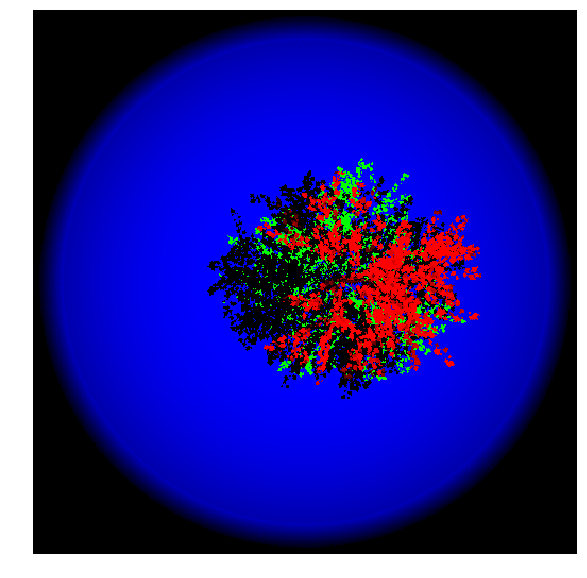

In [5]:
# now we can run the simulation
cmd = 'echo 14 camera/large_footprint.lidar light/large_footprint.lidar | \
       start -RATm 1 -RATsensor_wavebands wb/brdf_waveband.dat obj/birch_tree_scene.obj'
error = run_start(cmd)

if not error:
    # we can look at a slice of the resulting image using the 'order'
    # option, in this case we are looking at lidar.nBins steps 0, 10, 30
    # which correspond to near the top, middle and ground plane.
    ax = hips2img('{}.hips'.format(oname), stretch=True, 
                  order=[20, 50, 120])

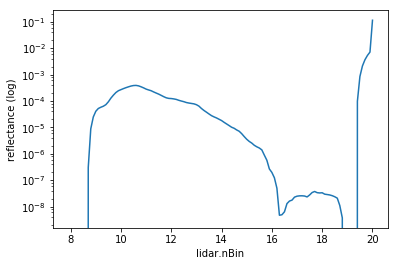

In [6]:
# We can then look at the results of this by plotting
# reflectance against bin number
refl = np.loadtxt('output/large_footprint.dat.direct')
plt.plot(refl[:, 0], refl[:, 1:].mean(axis=1))
plt.yscale('log') # because ground reflectance is high
plt.xlabel('lidar.nBin')
plt.ylabel('reflectance (log)')

### Small footprint LiDAR

/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:59: RuntimeWarning: invalid value encountered in true_divide
  arr_b = ((arr_b - np.percentile(arr_b, 2.5)) / np.percentile(arr_b, 97.5))
/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:60: RuntimeWarning: invalid value encountered in less
  arr_b[arr_b < 0] = 0
/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:61: RuntimeWarning: invalid value encountered in greater
  arr_b[arr_b > 1] = 1
/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:59: RuntimeWarning: divide by zero encountered in true_divide
  arr_b = ((arr_b - np.percentile(arr_b, 2.5)) / np.percentile(arr_b, 97.5))
/home/armstonj/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


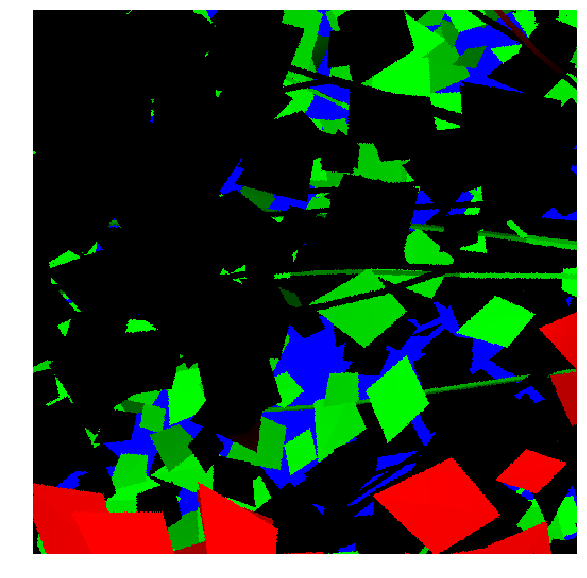

In [7]:
oname='output/small_footprint' # geometry.idealArea = .3
footprint = .3

update_existing_camera('light/pulse.lidar', 'light/small_footprint.lidar',
                       new_options={'lidar.pulseStart':pl_ln/2.,
                                    'lidar.pulseSD':pl_sd,
                                    'lidar.pulseLength':pl_ln,
                                    'lidar.pulseOPFile':'light/small.pulse',
                                    'geometry.boomLength':boomLength,
                                    'geometry.idealArea':footprint})

update_existing_camera('camera/pulse.lidar', 'camera/small_footprint.lidar', oname=oname,
                       new_options={'geometry.idealArea':footprint,
                                    'geometry.boomLength':boomLength,
                                    'lidar.binStart':binStart,
                                    'lidar.binStep':binStep,
                                    'lidar.nBins':nBins})

cmd = 'echo 14 camera/small_footprint.lidar light/small_footprint.lidar | \
       start -RATm 1 -RATsensor_wavebands wb/brdf_waveband.dat obj/birch_tree_scene.obj'
error = run_start(cmd)

if not error:
    # we can look at a slice of the resulting image using the 'order'
    # option, in this case we are looking at lidar.nBins steps 20, 50, 120
    ax = hips2img('{}.hips'.format(oname), stretch=True, 
                  order=[20, 50, 120])

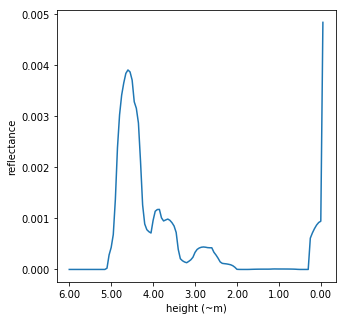

In [8]:
refl = np.loadtxt('output/small_footprint.dat.direct')
plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
ax.plot(refl[:, 1:].mean(axis=1))
ax.set_xticklabels(['{:.2f}'.format(v) for v in hoc - (ax.get_xticks() * binStep) / 2])
ax.set_xlabel('height (~m)')
ax.set_ylabel('reflectance')

## Changing the pulse spread function
This is achieved by adding a Gaussian function to the light source or the camera.

The additional options required are:

<code>samplingPattern.form</code> <span style=color:green><i># either Gaussian or square</i></span>

<code>samplingPattern.size</code> <span style=color:green><i># size of array steps (not in scene units)</i></span>

<code>samplingPattern.sd</code> <span style=color:green><i># function standard deviation</i></span>

<code>samplingPattern.centre</code> <span style=color:green><i># centre of function (in "size" units (see above))</i></span>

<code>samplingPattern.threshold</code> <span style=color:green><i># see notes below...</i></span>

<code>samplingPattern.OPImage</code> <span style=color:green><i># hips image of function</i></span>

/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:59: RuntimeWarning: invalid value encountered in true_divide
  arr_b = ((arr_b - np.percentile(arr_b, 2.5)) / np.percentile(arr_b, 97.5))
/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:60: RuntimeWarning: invalid value encountered in less
  arr_b[arr_b < 0] = 0
/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:61: RuntimeWarning: invalid value encountered in greater
  arr_b[arr_b > 1] = 1
/gpfs/data1/vclgp/armstonj/git/librat_in_jupyter/hips.py:59: RuntimeWarning: divide by zero encountered in true_divide
  arr_b = ((arr_b - np.percentile(arr_b, 2.5)) / np.percentile(arr_b, 97.5))
/home/armstonj/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


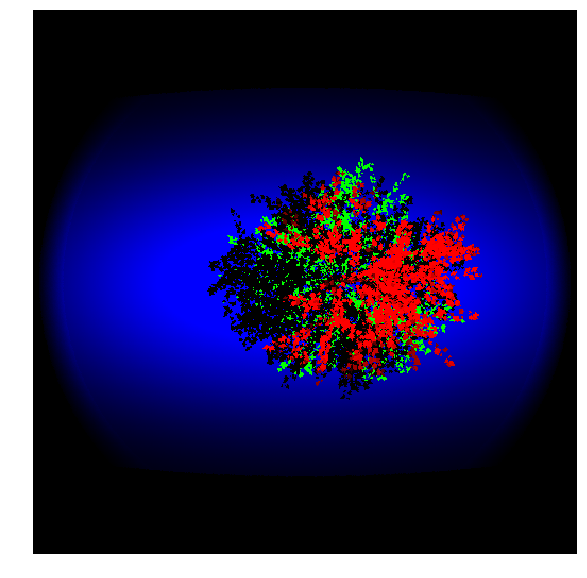

In [9]:
# in this example we have updated the PSF of a large footprint 
# instrument by manipulating the standard deviation

oname = 'output/lfp_gauss'
update_existing_camera('light/large_footprint.lidar', 'light/lfp_gauss.lidar',
                       new_options={'samplingPattern.form':'gaussian',
                                    'samplingPattern.size':[5000, 5000],
                                    'samplingPattern.sd':[1, 3], # changed sd values so fp is anisotropic
                                    'samplingPattern.centre':[3500, 3500],
                                    'samplingPattern.threshold':.1,
                                    'samplingPattern.OPImage':'light/opGaussian.hips'})

update_existing_camera('camera/large_footprint.lidar', 'camera/lfp_gauss.lidar' , oname=oname)

# now we can run the simulation
cmd = 'echo 14 camera/lfp_gauss.lidar light/lfp_gauss.lidar | \
       start -RATm 1 -RATsensor_wavebands wb/brdf_waveband.dat obj/birch_tree_scene.obj'
error = run_start(cmd)

if not error:
    ax = hips2img('{}.hips'.format(oname), stretch=True, 
                  order=[20, 50, 120])

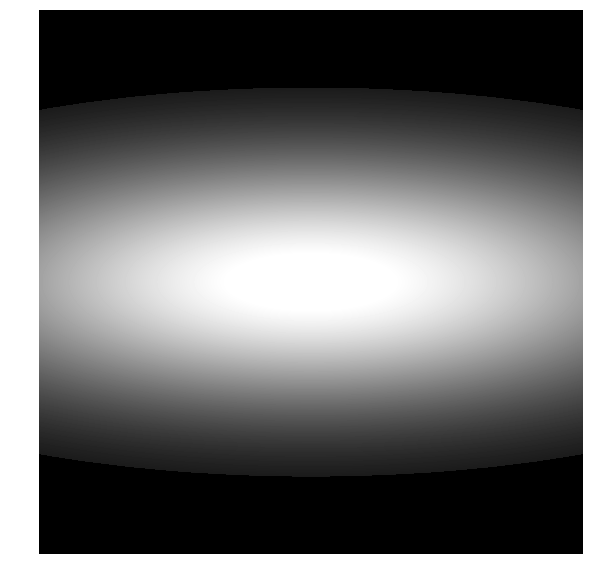

In [10]:
# We can then view the PSF
hips2img('light/opGaussian.hips', order=[0])